# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [2]:
# Load pickled data
import pickle

training_file = '../data/train.p'
validation_file='../data/valid.p'
testing_file = '../data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Use python, pandas or numpy methods rather than hard coding the results
import pandas as pd

# Number of training examples
n_train = len(y_train)

# Number of validation examples
n_validation = len(y_valid)

# Number of testing examples.
n_test = len(y_test)

# What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
labels_data = pd.read_csv("signnames.csv") 
n_classes = len(labels_data)

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

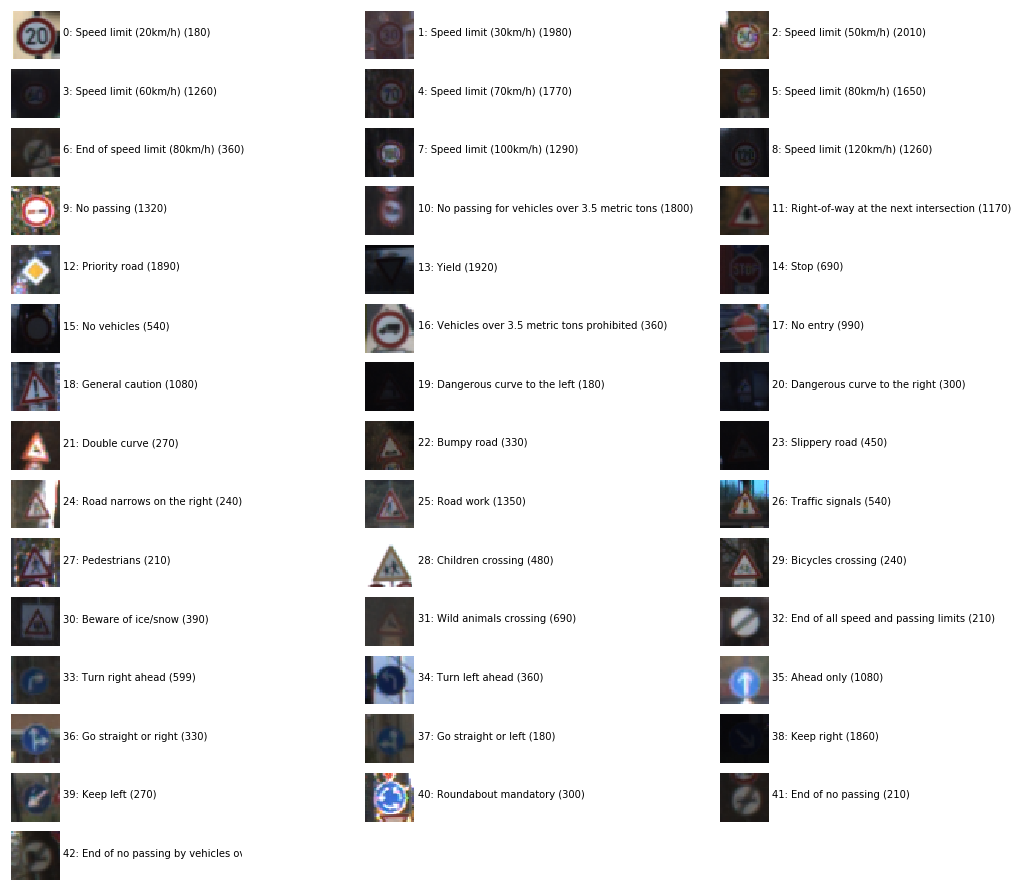

In [4]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


Nr = 3
Nc = len(labels_data) // Nr + 1

fig, axs = plt.subplots(Nc, Nr, figsize=(18, 16), frameon=False)
i = 0

for row in axs:
    for item in row:
        item.get_xaxis().set_visible(False)
        item.get_yaxis().set_visible(False)
        item.spines['top'].set_visible(False)
        item.spines['right'].set_visible(False)
        item.spines['bottom'].set_visible(False)
        item.spines['left'].set_visible(False)

signs_count = np.zeros(n_classes, np.uint32);
for sign_index in labels_data['ClassId']:
    #print(labels_data['SignName'][i])
    #print("Number in train set: ", np.count_nonzero(y_train == sign_index))
    index_of_first_sign = np.argwhere(y_train == sign_index)[0];
    image = X_train[index_of_first_sign][0]
    gridx = i // Nr
    gridy = i % Nr
    axs[gridx, gridy].imshow(image)
    signs_count[sign_index] =np.count_nonzero(y_train == sign_index)
    axs[gridx, gridy].text(image.shape[1] + 2, image.shape[1] // 2,  str(sign_index) + ": " + labels_data['SignName'][i] \
                           + ' (' + str(signs_count[sign_index]) + ')')
    i = i + 1
    
plt.show()

## The distribution in training dataset

<Container object of 43 artists>

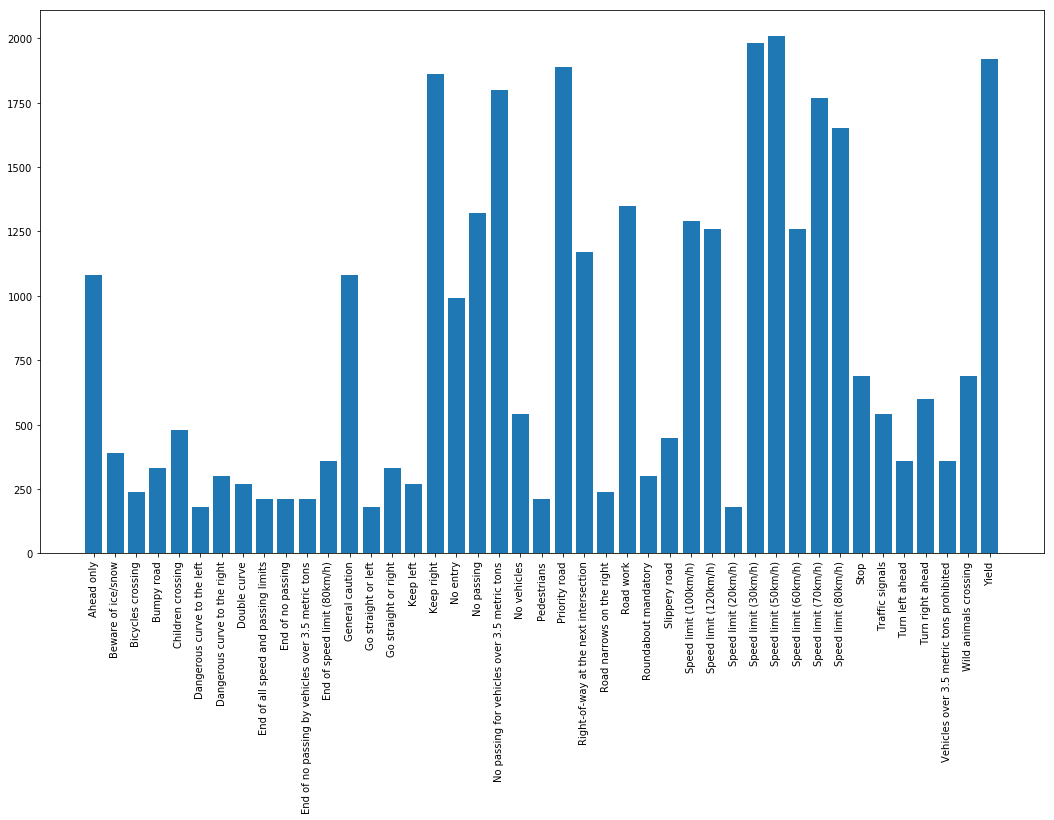

In [5]:
plt.figure(figsize=(18,10))
#list(range(n_classes))
plt.xticks(rotation=90)
plt.bar(labels_data['SignName'], signs_count)

----

## Step 2: Design and Test a Model Architecture

The LeNet-5 implementation is used as architecture of the deep learning model for german traffic signs recognition (for the dataset presented above) 


### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. 
Another option is to use gray images or normalized HUV channel

(32, 32)
414.314338235
24.2683823529
1.0
-1.0


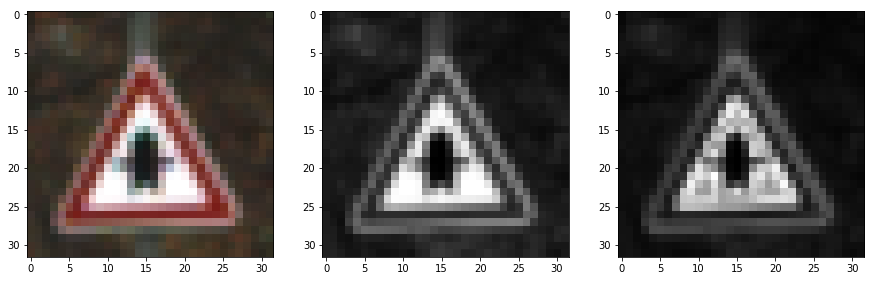

add fake images for class 0 len 180
add fake images for class 6 len 360
add fake images for class 16 len 360
add fake images for class 19 len 180
add fake images for class 20 len 300
add fake images for class 21 len 270
add fake images for class 22 len 330
add fake images for class 23 len 450
add fake images for class 24 len 240
add fake images for class 27 len 210
add fake images for class 28 len 480
add fake images for class 29 len 240
add fake images for class 30 len 390
add fake images for class 32 len 210
add fake images for class 34 len 360
add fake images for class 36 len 330
add fake images for class 37 len 180
add fake images for class 39 len 270
add fake images for class 40 len 300
add fake images for class 41 len 210
add fake images for class 42 len 210
New training set size: 40859


In [6]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
import cv2

def get_gray(image):
    # Grayscale image
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    return gray

def image_normalize(image):
    pix_mean = (np.min(image) + np.max(image)) / 2;
    dist = (np.max(image) - np.min(image)) / 2
    if (dist == 0):
        return image
    return (image - pix_mean) / dist

def get_sobel(image):
    gray = get_gray(image)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
    sobely = cv2.Sobel(get_gray(image), cv2.CV_64F, 0, 1)
    abs_sobelx = np.absolute(sobelx) + np.absolute(sobely) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.float64(abs_sobelx/np.max(abs_sobelx))
    scaled_sobel = gray*(1 + scaled_sobel)
    return scaled_sobel
    

def convert_to_one_channel_image_and_normalize(X_features):
    n_features = len(X_features)
    X_norm = np.zeros([n_features, image_shape[0], image_shape[1]])
    for i in range(n_features):
        image =  X_features[i]
        X_norm[i] = get_gray(image)
        X_norm[i] = image_normalize(X_norm[i])
        if (np.count_nonzero(X_norm[i] > 1)):
            print("incorrect norm")
    return X_norm;

X_train_norm = convert_to_one_channel_image_and_normalize(X_train)
X_valid_norm = convert_to_one_channel_image_and_normalize(X_valid)
X_test_norm = convert_to_one_channel_image_and_normalize(X_test)

print(X_train_norm[0].shape)

fig, axs = plt.subplots(1, 3, figsize=(15, 15), frameon=True)
index = random.randint(0, n_train)
axs[0].imshow(X_train[index])
axs[1].imshow(X_train_norm[index], cmap = 'gray')
random_fake_img = image_normalize(get_sobel(X_train[index]))
axs[2].imshow(random_fake_img, cmap = 'gray')
print(np.max(get_sobel(X_train[index])))
print(np.min(get_sobel(X_train[index])))

print(np.max(X_train_norm))
print(np.min(X_train_norm))

plt.show()

y_train_norm  = y_train
#print(len(X_train_norm))
#print(signs_count)
for sign_index in range(n_classes):
    fake_images = []
    if signs_count[sign_index] < 500:
        for i in range(n_train):
            if y_train[i] == sign_index:
                fake_images.append(image_normalize(get_sobel(X_train[i])))
    if len(fake_images) > 0:
        print("add fake images for class " + str(sign_index) + " len " + str(len(fake_images)))
        fake_images_array = np.array(fake_images)
        X_train_norm = np.concatenate((X_train_norm, np.array(fake_images)))
        y_train_norm = np.append(y_train_norm, np.full(len(fake_images), sign_index))
      
n_norm_train = len(X_train_norm)
print("New training set size: " + str(n_norm_train))
                                    

### Model Architecture

In [7]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten

def conv2d(x, W, b, strides=1, pad ='SAME'):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding = pad)
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)

def maxpool2d(x, k=2):
    return tf.nn.max_pool(
        x,
        ksize=[1, k, k, 1],
        strides=[1, k, k, 1],
        padding='VALID')

def LeNet(x, keep_prob):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.05
    
    x = tf.reshape(x, shape=[-1, image_shape[0], image_shape[1], 1])
    
    weights = {
    'wc1': tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 8), mean = mu, stddev = sigma)),
    'wc2': tf.Variable(tf.truncated_normal(shape=(5, 5, 8, 12), mean = mu, stddev = sigma)),
    'wf1': tf.Variable(tf.truncated_normal(shape=(300,120), mean = mu, stddev = sigma)),
    'wf2': tf.Variable(tf.truncated_normal(shape=(120,84), mean = mu, stddev = sigma)),
    'wout': tf.Variable(tf.truncated_normal(shape=(84,n_classes), mean = mu, stddev = sigma))}

    biases = {
    'bc1': tf.Variable(tf.zeros([8])),
    'bc2': tf.Variable(tf.zeros([12])),
    'bf1': tf.Variable(tf.zeros([120])),
    'bf2': tf.Variable(tf.zeros([84])),
    'bout': tf.Variable(tf.zeros([n_classes]))}
    
    #Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    l1 = conv2d(x, weights['wc1'], biases['bc1'], 1 , 'VALID')
    
    # Pooling. Input = 28x28x6. Output = 14x14x6.
    l1 = maxpool2d(l1, 2)
  
    # Layer 2: Convolutional. Output = 10x10x16.
    l2 = conv2d(l1, weights['wc2'], biases['bc2'], 1 , 'VALID')
    # Pooling. Input = 10x10x16. Output = 5x5x16.
    l2 = maxpool2d(l2, 2)

    # Flatten. Input = 5x5x16. Output = 400.
    
    l2d = tf.contrib.layers.flatten(l2)
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    l3 = tf.add(tf.matmul(l2d, weights['wf1']), biases['bf1'])

    # Activation.
    l3 = tf.nn.relu(l3)
    l3 = tf.nn.dropout(l3, keep_prob)
    # Layer 4: Fully Connected. Input = 120. Output = 84.   
    l4 = tf.add(tf.matmul(l3, weights['wf2']), biases['bf2'])
    # Activation.
    l4 = tf.nn.relu(l4)
    # Layer 5: Fully Connected. Input = 84. Output = 10.
    
    logits = tf.add(tf.matmul(l4, weights['wout']), biases['bout'])
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [8]:
from sklearn.utils import shuffle

x = tf.placeholder(tf.float32, (None, image_shape[0], image_shape[1]))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32) # probability to keep units

one_hot_y = tf.one_hot(y, n_classes)

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


rate = 0.005
EPOCHS = 15
BATCH_SIZE = 256

logits = LeNet(x, keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

In [14]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    for i in range(EPOCHS):
        X_train_norm, y_train_norm = shuffle(X_train_norm, y_train_norm)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_norm[offset:end], y_train_norm[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.8})
            
        testing_accuracy = evaluate(X_train_norm, y_train_norm)
        validation_accuracy = evaluate(X_valid_norm, y_valid)
        
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}".format(testing_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...
EPOCH 1 ...
Training Accuracy = 0.848
Validation Accuracy = 0.800
EPOCH 2 ...
Training Accuracy = 0.940
Validation Accuracy = 0.894
EPOCH 3 ...
Training Accuracy = 0.971
Validation Accuracy = 0.924
EPOCH 4 ...
Training Accuracy = 0.974
Validation Accuracy = 0.925
EPOCH 5 ...
Training Accuracy = 0.986
Validation Accuracy = 0.938
EPOCH 6 ...
Training Accuracy = 0.981
Validation Accuracy = 0.924
EPOCH 7 ...
Training Accuracy = 0.989
Validation Accuracy = 0.940
EPOCH 8 ...
Training Accuracy = 0.991
Validation Accuracy = 0.950
EPOCH 9 ...
Training Accuracy = 0.987
Validation Accuracy = 0.926
EPOCH 10 ...
Training Accuracy = 0.992
Validation Accuracy = 0.938
EPOCH 11 ...
Training Accuracy = 0.991
Validation Accuracy = 0.952
EPOCH 12 ...
Training Accuracy = 0.992
Validation Accuracy = 0.946
EPOCH 13 ...
Training Accuracy = 0.992
Validation Accuracy = 0.950
EPOCH 14 ...
Training Accuracy = 0.993
Validation Accuracy = 0.946
EPOCH 15 ...
Training Accuracy = 0.995
Validation Accuracy 

Test model on the test images:

In [11]:
with tf.Session() as sess:
    saver.restore(sess, './lenet')

    test_accuracy = evaluate(X_test_norm, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.012


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images. Predict the image signs

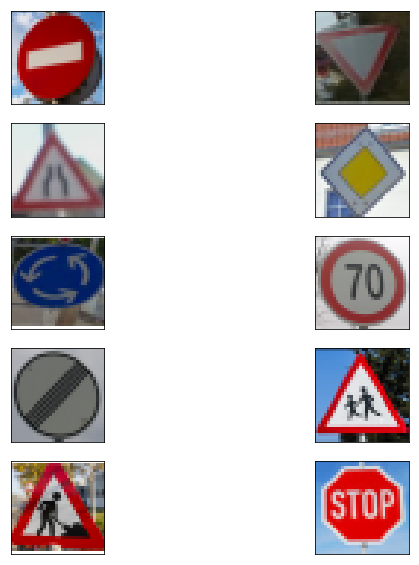

In [16]:
import matplotlib.image as mpimg
import os
input_path = "test_images";
fig, axs = plt.subplots(5, 2, figsize=(10, 10), frameon=False)
num_of_images = len(os.listdir(input_path)) - 1
i = 0;
for col in range(5):
    for row in range(2):
        filename = "sign_" + str(i+1) + ".png";
        image = mpimg.imread(  os.path.join( input_path, filename ))
        axs[col][row].imshow(image)
        axs[col][row].get_xaxis().set_visible(False)
        axs[col][row].get_yaxis().set_visible(False)
        i = i + 1
plt.show()

INFO:tensorflow:Restoring parameters from ./lenet


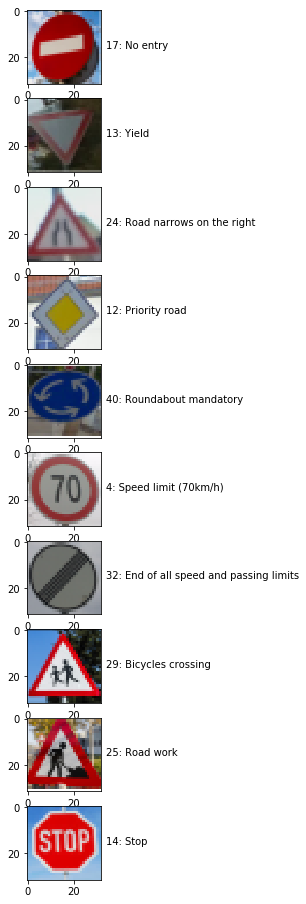

In [17]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import matplotlib.image as mpimg
import os
input_path = "test_images";

fig, axs = plt.subplots(10, 1, figsize=(18, 16), frameon=False)
i = 0;
predicted_indices = [];

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    num_of_images = len(os.listdir(input_path)) - 1
    for i in range(num_of_images):
        filename = "sign_" + str(i+1) + ".png";
        image = mpimg.imread(  os.path.join( input_path, filename ))
        norm_image = convert_to_one_channel_image_and_normalize([image]);
        axs[i].imshow(image, cmap = 'gray')
        predict = sess.run(logits, feed_dict={x: norm_image, keep_prob: 1.0})
        y = np.argmax(predict, axis=1)[0]
        predicted_indices.extend([y])
        axs[i].text(image.shape[1] + 2, image.shape[1] // 2,  str(y) + ": " + labels_data['SignName'][y])
        i = i + 1
plt.show()

    
    

### Analyze Performance

In [18]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
real_indices = [17, 13, 24, 12, 40, 4, 32, 28, 25, 14]
diff_count = np.count_nonzero(np.subtract(real_indices , predicted_indices))
print(predicted_indices)
print(diff_count)
print("Accuracy: " + str(100 - diff_count / len(real_indices) * 100) + "%")

[17, 13, 24, 12, 40, 4, 32, 29, 25, 14]
1
Accuracy: 90.0%


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [1]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
soft_max = tf.nn.softmax(logits)
top5 = tf.nn.top_k(soft_max, 5)

fig, axs = plt.subplots(10, 1, figsize=(15, 25), frameon=False)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    num_of_images = len(os.listdir(input_path)) - 1
    for i in range(num_of_images):
        filename = "sign_" + str(i+1) + ".png";
        image = mpimg.imread(  os.path.join( input_path, filename ))
        norm_image = convert_to_one_channel_image_and_normalize([image]);
        axs[i].imshow(image, cmap = 'gray')
        top5_predictions = sess.run(top5, feed_dict={x: norm_image, keep_prob: 1})
        axs[i].text(image.shape[1] + 2, 5,  "Real index " + str(real_indices[i]) + ": " + labels_data['SignName'][real_indices[i]])
        axs[i].text(image.shape[1] + 2, image.shape[0] // 2,  "Top5 prob " + str(top5_predictions.values))
        axs[i].text(image.shape[1] + 2, image.shape[0],  "Top5 indices " + str(top5_predictions.indices))
        i = i + 1
plt.show()
    


NameError: name 'tf' is not defined

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [13]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")